# Investigando uma base de dados - Titanic

O RMS Titanic foi um navio de passageiros britanico que colidiu com um iceberg em 14 de abril de 1912 e naufragou durante a madrugada do dia seguinte.

O conjunto de dados que será explorado nesse projeto tem como objetivo criar e responder algumas perguntas referentes as causas que influenciaram na chance de sobrevivencia dos passageiros.

O conjunto de dados possui informações de 891 dos 2224 passageiros que se encontravam no navio no momento do naufrágio.

In [2]:
#Vamos importas as bibliotecas e funções que serão usadas ao longo da análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Abre arquivo contendo os dados do titanic e os coloca em um data frame
titanic = pd.read_csv('titanic_data.csv')
#Define o Id do passageiro como o index do dataframe
titanic.set_index('PassengerId')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Exibindo algumas informações sobre os dados numericos
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Com as informações acima já encontramos um problema, nos dados, nem todos os passageiros descritos possuem idade registrada, mais precisamente, 177 passageiros na base de dados, não possuem idade definida no conjunto de dados, o que pode nos atrapalhar na hora de definir se a idade dos tripulantes foi um fator importante para a sobrevivencia dos mesmos.

Por tanto iremos realizar a limpeza dos dados.

Bom, a primeira atitude que podemos usar para tentar corrigir os dados é verificar os titulos dos passageiros, dentre os titúlos existe o título 'Master' que de acordo com o livro "Honor & Respect - The Official Guide to Names, 
Titles, and Forms of Address" é a forma utilizada para se descrever crianças jovens demais (até 12 anos) para serem chamadas de 'Mister'.

Por tanto vamos verificar todos os passageiros com titulo de Master.

Fonte:
http://www.formsofaddress.info/Children.html

In [4]:
#Vamos verificar primeiramento todos os passageiros com titulo Master
print len(titanic[titanic.Name.str.contains("Master")])

#Vamos verificar agora todos os passageiros com menos de 12 anos do sexo masculino
male_Passenger=titanic[titanic.Sex == 'male']
print len(male_Passenger[male_Passenger.Age <= 12])

#E vamos verificar quantas crianças do sexo masculino com menos de 12 anos não possuem o titulo Master
not_master = titanic[titanic.Sex == 'male']
not_master = not_master[not_master.Name.str.contains("Master")==False]
print len (not_master[not_master.Age<=12])

40
37
1


Estes número indicam que existem pelo menos três passageiros com no máximo 12 anos, sem idade definida no conjunto de dados, para a análise que pretendemos realizar, onde separaremos adultos de crianças considerando a idade como 12 anos, podemos definir a idade destes garotos como sendo 12 anos.

In [5]:
#Vamos encontrar os registros de crianças do sexo masculino que não possuem idade.
not_age = titanic[titanic.Sex == 'male']
not_age = not_age[not_age.Name.str.contains("Master")]
not_age = not_age[not_age.Age.isnull()]
#E vamos substituir as idades deles por 12 anos, para que continuem sendo considerados crianças
not_age.fillna(value=12, inplace=True)

#Enfim, vamos remover os registros originais e adicionar os registros com as idades modificadas
titanic = titanic.drop(titanic.index[[not_age.index]])
titanic=titanic.append(not_age)

In [6]:
#Se verificarmos agora, vemos que o registro conta com 41 menores de 12 anos, o que é equivalente aos 40 com titulo 
#'Master' mais o registro de um passageiro do sexo masculino com idade menor que 11 anos e sem o titulo.
male_Passenger=titanic[titanic.Sex == 'male']
print len(male_Passenger[male_Passenger.Age <= 12])

#Vamos executar novamente a função de descrição para garantir que continuamos com 891 PassengerIds, mas agora devemos 
#ter 718 idades, afinal, adicionamos 4 idades ao conjunto
titanic.describe()

41


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,718.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.600515,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.545782,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Vamos agora substituir as demais idades faltantes pela média atual de idades para não termos perda de consistencia na 
#consistencia dos dados no momento:
titanic = titanic.fillna(titanic['Age'].mean())

#Então tiraremos novamente alguns dados sobre as tabelas para garantir que com exceção da idade, eles permanecem iguais
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.600515,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.055744,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.600515,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#E para finalizar a limpeza de dados removeremos as tabelas que não serão mais utilizadas no projeto
titanic = titanic.ix[:, ['PassengerId','Survived', 'Pclass', 'Age', 'Sex']]

#Exibimos o conjunto de dados como se encontra no momento
titanic.head()

,PassengerId,Survived,Pclass,Age,Sex
0,1,0,3,22.0,male
1,2,1,1,38.0,female
2,3,1,3,26.0,female
3,4,1,1,35.0,female
4,5,0,3,35.0,male


Agora possuimos um conjunto de dados apenas contendo os dados que iremos utilizar na análise.

Para iniciar a verificação, vamos avaliar uma lei maritma não oficial muito conhecida que em situações de desastre iminente, é dada prioridade de se salvar 'Mulheres e crianças'. 

Vamos analisar se essa lei de fato influenciou na decisão de quem deveria ser resgatado durante o naufragio do Titanic.

In [9]:
def barGraph(df, h):
    """Função para gerar gráficos de barras"""
    sns.set(style="white")

    #Definimos aqui o range de valores que seram exibidos no grafico (0 - Para não sobreviventes / 1 - Para sobreviventes)
    survived = np.arange(0, 2)

    #Criamos o gráfico separando os sobreviventes pelas caracteristicas que desejamos ter no gráfico
    g = sns.factorplot(x="Survived", data=df, hue=h,kind="count",
                       palette="BuPu", size=5, aspect=1, order=survived)

    #Retorna o gráfico cos valores no eixo X sendo exibidos de 1 em 1
    return g.set_xticklabels(step=1)

def kdeGraph(df,h):
    """Função para criar gráficos de linhas por idade"""
    sns.set(style="white")

    #Definimos o gráfico separando os sobreviventes pelas caracteristicas que desejamos no gráfico
    graph = sns.FacetGrid(df,hue=h,aspect=3)

    #Define a divisão dos passageiros através da idade no eixo x
    graph.map(sns.kdeplot,'Age',shade='True')

    #Determina a extensão do eixo x no gráfico, para ir dos passageiros de menor idade, até o mais velho
    graph.set(xlim=(0,df['Age'].max()))
    graph.add_legend()
    return graph

# 1 - Gênero foi um fator determinante na decisão de quem deveria sobreviver no naufragio do Titanic?

Para responde essa pergunta, vamos verificar a quantidade de sobreviventes do sexo masculino e comparar com a quantidade de sobreviventes do sexo feminino.

In [10]:
#Vamos criar um conjunto de dados contendo o gênero, o identificador do passageiro e a informação se o mesmo 
#sobreviveu ou não para facilitar a visualização
gender_by_survival=(titanic.ix[:, ['Sex', 'Survived', 'PassengerId']])

#Em seguida vamos exibir os dados de forma organizada para exibir quantos passageiros de cada sexo sobreviveram
gender_by_survival.groupby(['Sex','Survived']).count()

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

In [11]:
#Vamos exibir agora alguns dados descritivos
gender_by_survival.groupby(['Sex']).describe()

PassengerId    Survived
Sex                                  
female count   314.000000  314.000000
       mean    431.028662    0.742038
       std     256.846324    0.438211
       min       2.000000    0.000000
       25%     231.750000    0.000000
       50%     414.500000    1.000000
       75%     641.250000    1.000000
       max     889.000000    1.000000
male   count   577.000000  577.000000
       mean    454.147314    0.188908
       std     257.486139    0.391775
       min       1.000000    0.000000
       25%     222.000000    0.000000
       50%     464.000000    0.000000
       75%     680.000000    0.000000
       max     891.000000    1.000000

Como os valores de sobrevivencia e óbito estão definidos como 0 e 1, podemos, através da média, obter a taxa de sobrevivencia deste conjunto de dados, pois todo valor exibido na coluna 'Survived' será a fração de sobreviventes do grupo.

Os dados acima demonstram que enquanto aproximadamente 74% (0.742038) das passageiras do sexo feminino sobreviveram, enquanto mais de 18% (0.188908) dos homens sobreviveram ao incidente.

Isso indica uma forte correlação entre o gênero do passageiro e sua chance de sobrevivencia no desastre.

Vamos criar agora um gráfico para facilitar a visualização

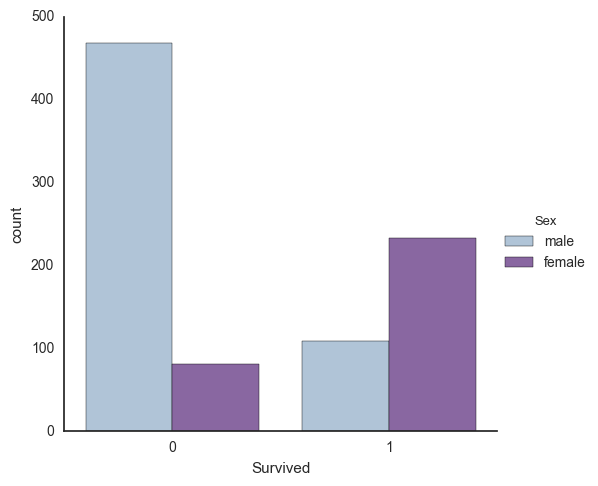

In [12]:
#Agora vamos criar um gráfico que demonstra a quantidade de homens e mulheres que sobreviveram ou faleceram no naufrágio
#Usando a função criada anteriormente
barGraph(gender_by_survival,"Sex")

O gráfico reforça a idéia de que houve uma significativa correlação entre o gênero dos passageiros e as chances que eles tiveram de sobreviver.

### Conclusão da questão 1

Embora exista a possibilidade de termos diversas váriaveis ocultas, os números que possuimos, unidos ao conhecido sobre situações de desastre é um indicativo de que a o conceito 'Mulheres e crianças primeiro' teve aplicabilidade, ao menos no quesito relativo ao gênero.

Existe a possibilidade de a localização do passageiro no návio na hora do incidente, ou mesmo a classe social do passageiro (como veremos mais a diante) terem tido influencia significativa na chance de sobrevivência.

No entanto os dados que temos são significativos para afirmarmos que existe uma boa chance de mulheres terem tido prioridade no momento de se decidir quem sobreviveria ou não.

# 2 - Idade foi um fator determinante na decisão de quem deveria sobreviver no naufrágio do Titanic?

In [13]:
#Primeiro vamos criar um conjunto contendo apenas as tabelas que iremos usar.
group=(titanic.ix[:, ['Sex', 'Survived', 'PassengerId', 'Age']])

#Agora, vamos separar apenas os passageiros do sexo masculino
male_passengers=group[group.Sex=='male']

#E vamos dividi-los em crianças e adultos
male_adult=male_passengers[male_passengers.Age>12]
male_child=male_passengers[male_passengers.Age<=12]

#Vamoes então remover as tabelas que não nos interassam mais
male_adult=male_adult.ix[:, ['Survived', 'PassengerId']]
male_child=male_child.ix[:, ['Survived', 'PassengerId']]

#E vamos então exibir a quantidade de sobreviventes adultos do sexo masculino
male_adult.groupby(['Survived']).count()

,PassengerId
Survived,
0,450
1,86


In [14]:
#E agora vamos exibir a quantidade de sobreviventes crianças do sexo masculino
male_child.groupby(['Survived']).count()

,PassengerId
Survived,
0,18
1,23


In [15]:
#Exibindo alguns dados
print (u"Dados dos passageiros adultos do sexo masculino:")
print male_adult.describe()
print (u"Dados dos passageiros crianças do sexo masculino:")
print male_child.describe()

Dados dos passageiros adultos do sexo masculino:
         Survived  PassengerId
count  536.000000   536.000000
mean     0.160448   456.552239
std      0.367364   253.927293
min      0.000000     1.000000
25%      0.000000   227.750000
50%      0.000000   467.500000
75%      0.000000   674.250000
max      1.000000   891.000000
Dados dos passageiros crianças do sexo masculino:
        Survived  PassengerId
count  41.000000    41.000000
mean    0.560976   422.707317
std     0.502433   302.008215
min     0.000000     8.000000
25%     0.000000   166.000000
50%     1.000000   349.000000
75%     1.000000   756.000000
max     1.000000   870.000000


Em posse dos dados, verificamos que em torno de 56% (0.560976) das crianças do sexo masculino sobreviveram, enquanto apenas cerca 16% (0.160448) dos adultos do sexo masculino sobreviveram.

O que indica que há correlação que pode ser atribuida ao fator idade, embora não seja tão forte quanto a vista no fator gênero.

Vamos criar alguns gráficos para visualizar melhor

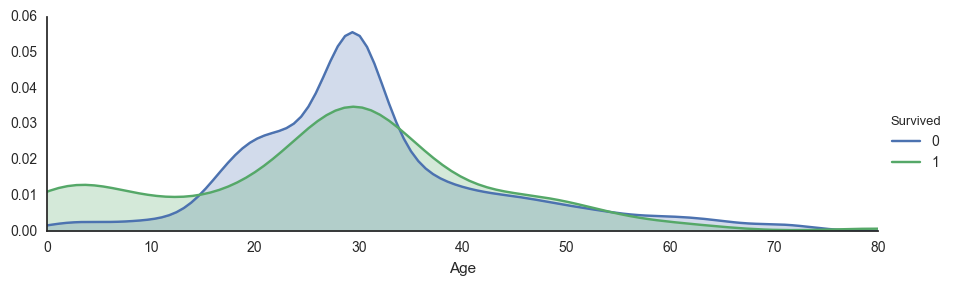

In [16]:
#Gráficos que demonstram quantidade de homens adultos e crianças que sobreviveram ou faleceram no naufragio
kdeGraph(male_passengers,'Survived')

Observando o gráfico, notamos que uma taxa significativa de sobreviventes foi de crianças até 12 anos, enquanto uma taxa extremamente baixa de óbitos ocorreu em passageiros da mesma idade.

Embora a idade que teve a maior porcentagem de sobreviventes tenha sido por volta dos 30 anos, está também foi a idade com maior quantidade de óbitos, provavelmente por que era a idade que a maior parte dos passageiros do sexo masculino possuiam durante a viagem.

A diferença indica, por tanto, uma correlação significativa na idade dos passageiros e sua chance de sobrevivência.

Também podemos aprofundar essa verificação nas crianças do sexo feminino, embora não tenhamos dados suficientes para ter certeza se as crianças do sexo feminino tiveram maior taxa de sobrevivencia do que as mulheres adultas, podemos fazer uma estimativa razoavel considerando as informações que temos.

In [17]:
#Vamos separar apenas as passageiras do sexo feminino
female_passengers=group[group.Sex=='female']

#E vamos dividi-las em crianças e adultas
female_adult=female_passengers[female_passengers.Age>12]
female_child=female_passengers[female_passengers.Age<=12]

#Vamos então remover as tabelas que não nos interassam mais
female_adult=female_adult.ix[:, ['Survived', 'PassengerId']]
female_child=female_child.ix[:, ['Survived', 'PassengerId']]

#E vamos então exibir a quantidade de sobreviventes adultos do sexo feminino
female_adult.groupby(['Survived']).count()

,PassengerId
Survived,
0,68
1,214


In [18]:
#E agora vamos exibir a quantidade de sobreviventes crianças do sexo feminino
female_child.groupby(['Survived']).count()

,PassengerId
Survived,
0,13
1,19


In [19]:
#Exibindo alguns dados
print (u"Dados das passageiras adultas do sexo feminino:")
print female_adult.describe()
print (u"Dados das passageiras crianças do sexo feminino:")
print female_child.describe()

Dados das passageiras adultas do sexo feminino:
         Survived  PassengerId
count  282.000000   282.000000
mean     0.758865   431.641844
std      0.428532   257.607089
min      0.000000     2.000000
25%      1.000000   237.250000
50%      1.000000   407.500000
75%      1.000000   641.250000
max      1.000000   889.000000
Dados das passageiras crianças do sexo feminino:
        Survived  PassengerId
count  32.000000    32.000000
mean    0.593750   425.625000
std     0.498991   254.001746
min     0.000000    11.000000
25%     0.000000   200.750000
50%     1.000000   459.500000
75%     1.000000   637.000000
max     1.000000   853.000000


Analisando estes dados podemos concluir que cerca de 59% (0.593750) das passageiras crianças do sexo feminino sobreviveram, enquanto mais de 75% (0.758865) das mulheres adultas do sexo feminino sobreviveram ao incidente, o que não indica que o fator da idade tenha sido tão determinante para a sobrevivencia das mulheres durante o naufrágio como foi para os homens.

Vamos criar um gráfico para visualizar melhor.

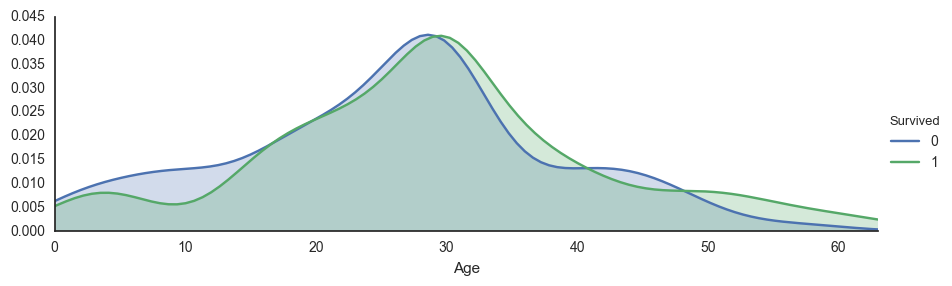

In [20]:
#Graficos que demonstram quantidade de mulheres adultas e crianças que sobreviveram ou faleceram no naufragio
kdeGraph(female_passengers,'Survived')

Pelo gráfico notamos que uma parte significativa das passageiras crianças sobreviveu ao incidente, no entanto também notamos que o as linhas de taxa de sobrevivencia e de óbitos são quase igualmente distribuidas ao longo das idades.

Esse comportamento parece demonstrar que as passageiras do sexo feminino, independente da idade, tiveram chances similates de sobreviver.

Isso corrobora os dados de que a taxa de sobrevivencia nas passageiras adultas foi maior do que a das crianças, o que não necessáriamente implica que elas tiveram alguma vantagem sobre as crianças, mas indica que a idade pode não ter sido um fator tão fundamental como foi para os homens.

### Conclusão da questão 2

É notavel que houve uma grande diferença na taxa de sobrêvivencia entre homens e mulheres, porém, quando comparamos a taxa de sobrevivência entre crianças de ambos os gêneros, a diferença é extremamente pequena.

Isso indica que ao se tratarem de crianças, ambos os gêneros tiveram preferência similar na hora de se definir quem seria salvo.

O fato de uma porcentagem maior de mulheres adultas terem sobrevivido pode se dar ao fato de que havia uma quantidade muito maior de passageiras adultas do que de crianças.

Também podemos considerar diversas váriaveis ocultas, como a localização dos passageiros na hora do naufrágio, crianças que estavam sem adultos por perto podem ter tido maior dificuldade de encontrarem os botes para escaparem, entre outros fatores.

# 3 - Classe social foi um fator determinante no momento de se decidir quem teria maiores chances de sobrevivência?

Para responder essa pergunta vamos analisar a taxa de sobrevivência em cada uma das três classes de passageiros (1ª, 2ª e 3ª).
No entanto, as correlações verificadas podem não indicar casualidade, uma vez que existem fortes indicações que gênero e idade são um fator importante para sobrevivência.

Por tanto vamos realizar uma análise geral, e em seguida realizaremos a análise considerando os gêneros masculino (que possuiu o menor número de sobreviventes) e feminino (que possuiu o maior número de sobreviventes) para verificar a importância deste fator.

In [21]:
#Primeiro vamos exibir um conjunto de dados só com as tabelas que nos interessam
passenger_by_class = titanic.ix[:, ['PassengerId', 'Survived', 'Sex', 'Pclass']]

#Agora vamos exibir os dados organizados pela classe que os passageiros se encontram
passenger_by_class.groupby(['Pclass']).count()

,PassengerId,Survived,Sex
Pclass,,,
1,216,216,216
2,184,184,184
3,491,491,491


In [22]:
#Vamos então exibir alguns dados
passenger_by_class.groupby(['Pclass']).describe()

PassengerId    Survived
Pclass                               
1      count   216.000000  216.000000
       mean    461.597222    0.629630
       std     246.737616    0.484026
       min       2.000000    0.000000
       25%     270.750000    0.000000
       50%     472.000000    1.000000
       75%     670.500000    1.000000
       max     890.000000    1.000000
2      count   184.000000  184.000000
       mean    445.956522    0.472826
       std     250.852161    0.500623
       min      10.000000    0.000000
       25%     234.500000    0.000000
       50%     435.500000    0.000000
       75%     668.000000    1.000000
       max     887.000000    1.000000
3      count   491.000000  491.000000
       mean    439.154786    0.242363
       std     264.441453    0.428949
       min       1.000000    0.000000
       25%     200.000000    0.000000
       50%     432.000000    0.000000
       75%     666.500000    0.000000
       max     891.000000    1.000000

Os dados nos mostram que aproximadamente 62%(0.629630) dos passageiros da primeira classe sobreviveram, enquanto cerca de 47% (0.472826) dos passageiros da segunda classe e apenas 24% (0.242363) dos passageiros da terceira classe.

O que indica que houve uma correlação entre a classe dos passageiros e sua chance de sobrevivência, no entanto essa informação pode estar contaminada pelas analises de gênero e idade já citadas.

Por tanto, vamos dividir os dados por gênero, para tentar obter uma informação um pouco mais precisa.

In [23]:
#Agora vamos exibir os dados organizados por sexo, classe e sobrevivencia
passenger_by_class.groupby(['Sex','Pclass']).count()

PassengerId  Survived
Sex    Pclass                       
female 1                94        94
       2                76        76
       3               144       144
male   1               122       122
       2               108       108
       3               347       347

In [24]:
#Em seguida vamos exibir algumas estatisticas de cada campo
passenger_by_class.groupby(['Sex','Pclass']).describe()

PassengerId    Survived
Sex    Pclass                               
female 1      count    94.000000   94.000000
              mean    469.212766    0.968085
              std     247.476723    0.176716
              min       2.000000    0.000000
              25%     293.500000    1.000000
              50%     447.000000    1.000000
              75%     698.250000    1.000000
              max     888.000000    1.000000
       2      count    76.000000   76.000000
              mean    443.105263    0.921053
              std     243.627288    0.271448
              min      10.000000    0.000000
              25%     269.750000    1.000000
              50%     439.500000    1.000000
              75%     616.750000    1.000000
              max     881.000000    1.000000
       3      count   144.000000  144.000000
              mean    399.729167    0.500000
              std     267.232416    0.501745
              min       3.000000    0.000000
              25%     165.250000    0.000000
              50%     376.000000    0.500000
              75%     636.000000    1.000000
              max     889.000000    1.000000
male   1      count   122.000000  122.000000
              mean    455.729508    0.368852
              std     247.026449    0.484484
              min       7.000000    0.000000
              25%     255.500000    0.000000
              50%     480.500000    0.000000
              75%     660.750000    1.000000
              max     890.000000    1.000000
       2      count   108.000000  108.000000
              mean    447.962963    0.157407
              std     256.922546    0.365882
              min      18.000000    0.000000
              25%     225.750000    0.000000
              50%     416.500000    0.000000
              75%     677.500000    0.000000
              max     887.000000    1.000000
       3      count   347.000000  347.000000
              mean    455.515850    0.135447
              std     261.921251    0.342694
              min       1.000000    0.000000
              25%     209.500000    0.000000
              50%     466.000000    0.000000
              75%     687.500000    0.000000
              max     891.000000    1.000000

Ao observar a primeira classe notamos que quase 96% (0.968085) dos passageiros do sexo feminino da primeira classe sobreviveram, em comparação com 92% (0.921053) da segunda classe e apenas 50% (0.500000) da terceira classe.

Quanto aos passageiros do sexo masculino, cerca de 36% (0.368852) dos passageiros da primeira classe sobreviveram, contra 15% (0.157407) da segunda classe e 13% (0.135447) da terceira.

Vamos agora elaborar alguns gráficos facilitar a visualização.

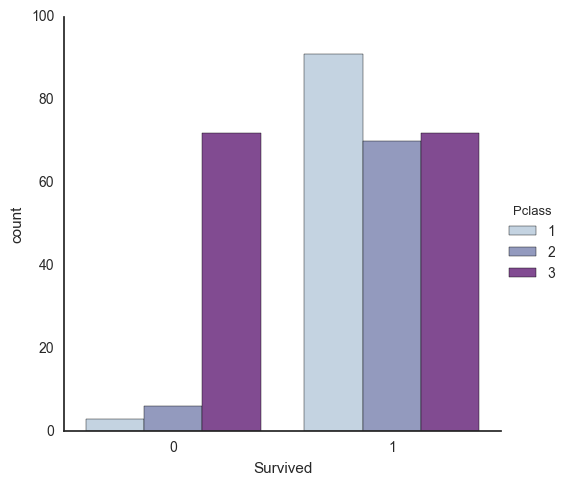

In [25]:
#Gráficos que demonstra a relação de sobreviventes do gênero feminino por classe
barGraph(passenger_by_class[passenger_by_class.Sex=='female'],"Pclass")

Este gráfico demonstra que enquanto praticamente todas as passageiras da primeira e segunda classe sobreviveram, apenas metade das passageiras da terceira classe tiveram a mesma sorte.

A diferença discrepante na taxa de sobrevivência das passageiras da terceira classe para a das demais, indica que houve uma correlação significativa entre a classe na qual o passageiro se encontrava, e suas chances de sobrevivência.

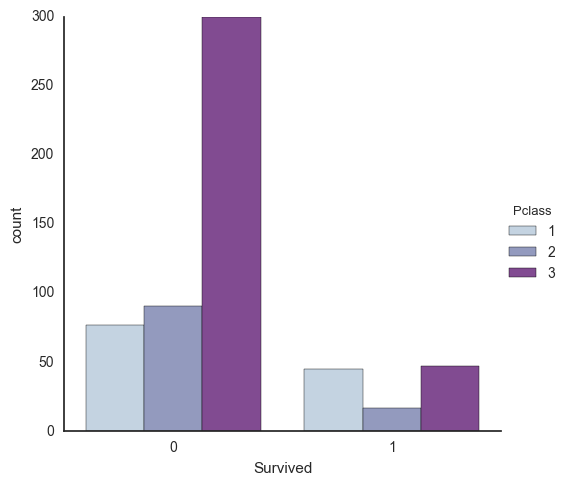

In [26]:
#Gráficos que demonstra a relação de sobreviventes do gênero feminino por classe
barGraph(passenger_by_class[passenger_by_class.Sex=='male'],"Pclass")

Este gráfico permite uma visualização interessante, o grupo que teve a maior quantidade de sobreviventes foi o da terceira classe, ainda assim, a taxa de óbito da terceira classe foi tão significativamente maior que a das demais, que a correlação entre a classe e a taxa de sobrevivência fica bem clara.

No entanto, ao contrário do que aconteceu com as passageiras do sexo feminino, onde as passageiras da primeira e segunda classe tiveram taxas de sobrevivência similares, aqui, os passageiros de segunda e terceira classe tiveram taxas de sobrevivência similares, enquanto as taxas de sobrevivência dos passageiros da primeira classe se sobressairam mais significativamente.

### Conclusão da questão 3

Existe uma chance alta de a classe social ter influenciado nas chances de sobrevivência dos passageiros, quando dividimos o conjunto de dados por gênero essa relação ficou mais clara, principalmente quando analisamos a taxa de óbitos da terceira classe das passageiras do sexo feminino, e a taxa de sobrevivência da primeira classe dos passageiros do sexo masculino.

Como mencionado anteriormente, correlação não indica casualidade, podem existir diversas outras váriaveis não levadas em conta, como por exemplo a localização da cabine no momento do incidente, a distância que cada passageiro estava dos botes salva-vidas, doenças e problemas de saúde que podem ter dificultado a movimentação dos passageiros, entre outras coisas.

### Possíveis análises futuras 

Futuramente com este conjunto de dados seria possível análisar conjuntos das familias considerando os sobrenomes além das váriaveis Sibsp e Parch para tentar determinar se pessoas que estavam acompanhas de suas familias tiveram mais chance de sobreviver.

Também seria possivel analisar questões como custo médio das passagens considerando a região de embarque, média de sobreviventes por região, entre outras questões.

Mas para este trabalho, as análises realizadas foram suficientes para chegar a algumas conclusões.

# Conclusão

Para encerrar, podemos concluir que a chance de sobrevivência de cada passageiro foi influenciada por não um, mas uma série de fatores como gênero, idade e classe social.

Mais de cem anos depois ainda é dificil dizer todos os motivos que levaram algumas pessoas a escapar vivas, e outras a falecer em alto mar em um dos náufragio mais conhecidos da história.

Não há como saber todos os fatores que influenciaram na chance de sobrevivência dos passageiros, existem diversos fatores e variaveis que não podemos prever, no entanto, com o conjunto de dados que temos podemos estimar, que alguns dos cliches basico que vemos no cinema se fizeram validos no incidente real.

Dentro deste conjunto de dados, é muito possível que "Mulheres e crianças" realmente se salvaram primeiro. 

E os mais ricos tiveram maior chance de sobreviver do que os mais pobres.
